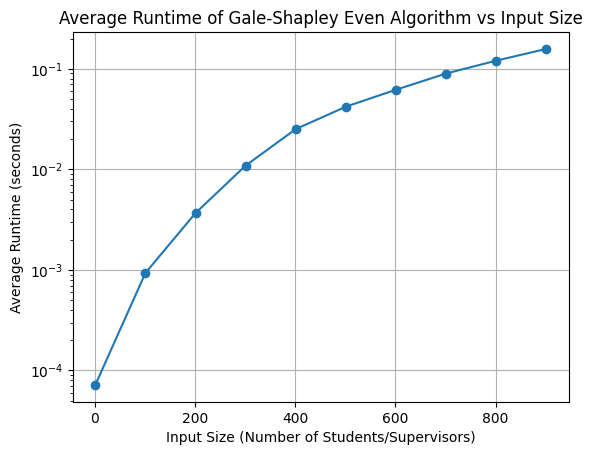

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def generate_large_preferences(num_students, num_supervisors):
    student_preferences = {}
    supervisor_preferences = {}

    for student_id in range(num_students):
        student_pref = random.sample(range(num_supervisors), num_supervisors)
        student_preferences[student_id] = student_pref

    for supervisor_id in range(num_supervisors):
        supervisor_pref = random.sample(range(num_students), num_students)
        supervisor_preferences[supervisor_id] = supervisor_pref

    return student_preferences, supervisor_preferences

def gs_even(student_preferences, supervisor_preferences):
    supervisor_preferences = {k: [int(id) for id in v] for k, v in supervisor_preferences.items()}

    matches = {}
    free_students = list(student_preferences.keys())

    while free_students:
        student = free_students.pop(0)
        supervisor = student_preferences[student].pop(0)
        current_match = matches.get(supervisor)

        if not current_match:
            matches[supervisor] = student
        else:
            supervisor_pref_list = supervisor_preferences[supervisor]
            if supervisor_pref_list.index(current_match) > supervisor_pref_list.index(student):
                matches[supervisor] = student
                free_students.append(current_match)
            else:
                free_students.append(student)

    inverted_matches = {v: k for k, v in matches.items()}  
    return inverted_matches

input_sizes = []
avg_runtimes = []

start_num_students = 1
start_num_supervisors = 1
max_num_students = 1000
step = 100
num_iterations = 10

num_students = start_num_students
num_supervisors = start_num_supervisors

while num_students <= max_num_students:
    runtimes_iter = []

    for _ in range(num_iterations):
        student_preferences, supervisor_preferences = generate_large_preferences(num_students, num_supervisors)

        start_time = time.time()
        gs_even(student_preferences, supervisor_preferences)
        end_time = time.time()
        runtime = end_time - start_time
        runtimes_iter.append(runtime)

    avg_runtime = sum(runtimes_iter) / num_iterations

    input_sizes.append(num_students)
    avg_runtimes.append(avg_runtime)

    num_students += step
    num_supervisors += step

plt.plot(input_sizes, avg_runtimes, marker='o')
plt.title('Average Runtime of Gale-Shapley Even Algorithm vs Input Size')
plt.xlabel('Input Size (Number of Students/Supervisors)')
plt.ylabel('Average Runtime (seconds)')
plt.grid(True)
plt.yscale('log')
plt.show()
